In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('diem-after-cleaning.csv')
data

,Unnamed: 0,P1,P2,P3,Thi
0,0,8.375,7.25,8.50,9.0
1,1,8.250,7.25,8.50,9.0
2,2,8.500,7.50,8.50,10.0
3,3,4.000,7.25,8.50,9.0
4,4,8.750,7.50,8.50,9.5
...,...,...,...,...,...
292,292,5.500,6.75,6.75,6.5
293,293,7.000,6.25,7.00,6.0
294,294,4.000,6.25,7.00,6.0
295,295,7.500,8.00,7.00,7.0


In [5]:
data.drop(['Unnamed: 0'],axis=1, inplace = True)
data

,P1,P2,P3,Thi
0,8.375,7.25,8.50,9.0
1,8.250,7.25,8.50,9.0
2,8.500,7.50,8.50,10.0
3,4.000,7.25,8.50,9.0
4,8.750,7.50,8.50,9.5
...,...,...,...,...
292,5.500,6.75,6.75,6.5
293,7.000,6.25,7.00,6.0
294,4.000,6.25,7.00,6.0
295,7.500,8.00,7.00,7.0


In [6]:
data.to_csv(path_or_buf='diem-after-cleaning.csv', index = False)

In [7]:
data = pd.read_csv('diem-after-cleaning.csv')
data

,P1,P2,P3,Thi
0,8.375,7.25,8.50,9.0
1,8.250,7.25,8.50,9.0
2,8.500,7.50,8.50,10.0
3,4.000,7.25,8.50,9.0
4,8.750,7.50,8.50,9.5
...,...,...,...,...
292,5.500,6.75,6.75,6.5
293,7.000,6.25,7.00,6.0
294,4.000,6.25,7.00,6.0
295,7.500,8.00,7.00,7.0


In [9]:
X = data.values[:,:3]
Y = data.values[:,3]

In [10]:
X

array([[ 8.375     ,  7.25      ,  8.5       ],
       [ 8.25      ,  7.25      ,  8.5       ],
       [ 8.5       ,  7.5       ,  8.5       ],
       [ 4.        ,  7.25      ,  8.5       ],
       [ 8.75      ,  7.5       ,  8.5       ],
       [ 7.75      ,  7.75      ,  7.75      ],
       [ 7.        ,  3.        ,  7.        ],
       [ 7.5       ,  7.5       ,  7.5       ],
       [ 7.        ,  7.        ,  7.        ],
       [ 7.25      ,  7.        ,  7.        ],
       [ 7.625     ,  7.25      ,  7.        ],
       [ 7.75      ,  7.25      ,  7.25      ],
       [ 7.625     ,  7.375     ,  7.75      ],
       [ 7.5       ,  6.5       ,  6.75      ],
       [ 7.5       ,  7.25      ,  7.        ],
       [ 8.5       ,  8.        ,  9.        ],
       [ 8.125     ,  7.625     ,  7.5       ],
       [ 8.125     ,  7.625     ,  7.75      ],
       [ 8.25      ,  7.875     ,  8.        ],
       [ 8.        ,  7.25      ,  8.25      ],
       [ 7.75      ,  7.        ,  6.   

In [11]:
Y

array([ 9.        ,  9.        , 10.        ,  9.        ,  9.5       ,
        7.5       ,  7.        ,  7.5       ,  7.        ,  7.5       ,
        7.25      ,  7.5       ,  7.5       ,  7.        ,  7.25      ,
        9.        ,  7.75      ,  7.75      ,  7.5       ,  8.        ,
        7.5       ,  8.        ,  0.        ,  8.5       ,  8.        ,
        7.5       ,  7.5       ,  7.        ,  7.        ,  7.25      ,
        7.        ,  7.5       ,  7.        ,  8.        ,  7.5       ,
        8.        ,  8.        ,  8.        ,  8.25      ,  8.        ,
        8.        ,  7.25      ,  7.        ,  6.5       ,  0.        ,
        7.5       ,  7.5       ,  8.        ,  7.5       ,  7.75      ,
        7.75      ,  7.5       ,  7.5       ,  7.5       ,  7.75      ,
        6.5       ,  8.        ,  8.        ,  9.        ,  8.        ,
        0.        ,  7.        ,  0.        ,  6.        ,  7.        ,
        7.        ,  0.        ,  7.        ,  7.5       ,  6.  

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
X_train.shape

(237, 3)

In [16]:
X_test.shape

(60, 3)

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


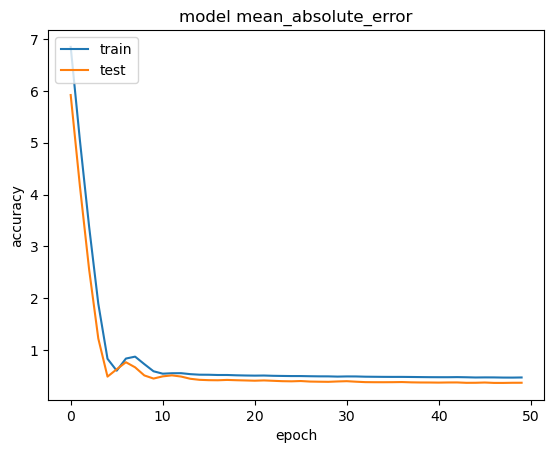

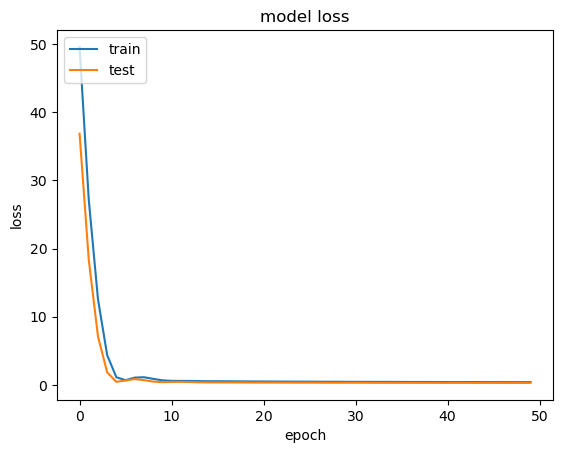

In [19]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=0)
print(history.history.keys())

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4456 - mean_absolute_error: 0.4795
Metric  loss : 0.45
Metric  mean_absolute_error : 0.48


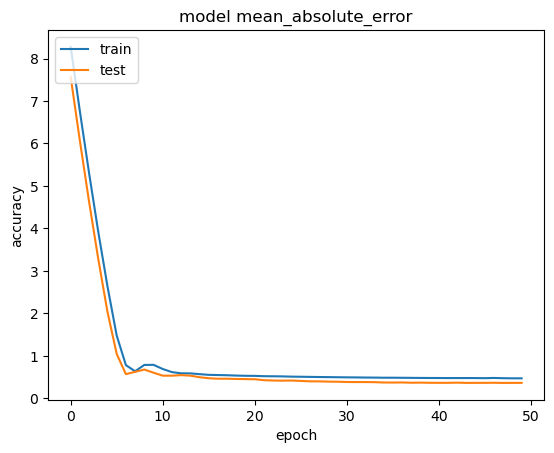

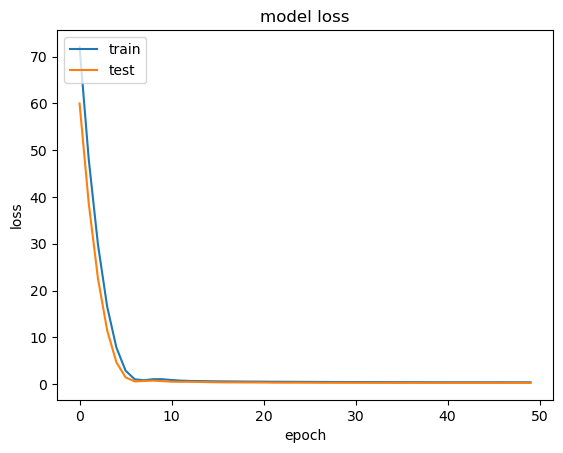

In [21]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5090 - mean_absolute_error: 0.5010
Metric  loss : 0.51
Metric  mean_absolute_error : 0.5


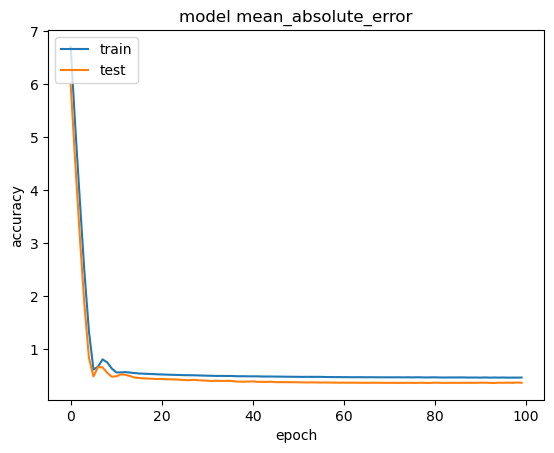

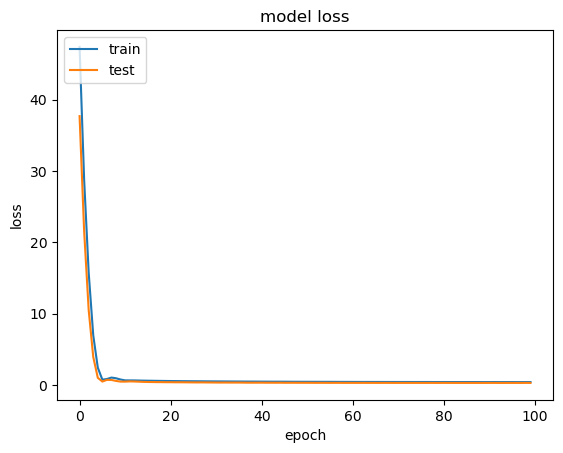

In [22]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4422 - mean_absolute_error: 0.4439
Metric  loss : 0.44
Metric  mean_absolute_error : 0.44


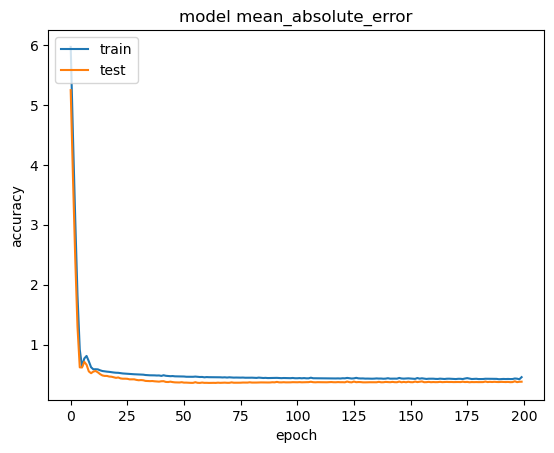

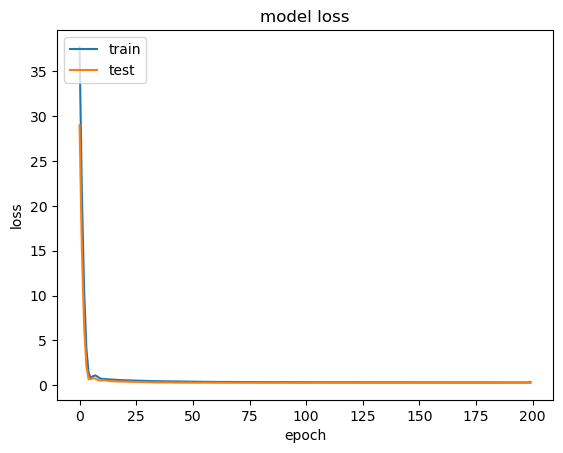

In [23]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=200, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4456 - mean_absolute_error: 0.4429
Metric  loss : 0.45
Metric  mean_absolute_error : 0.44


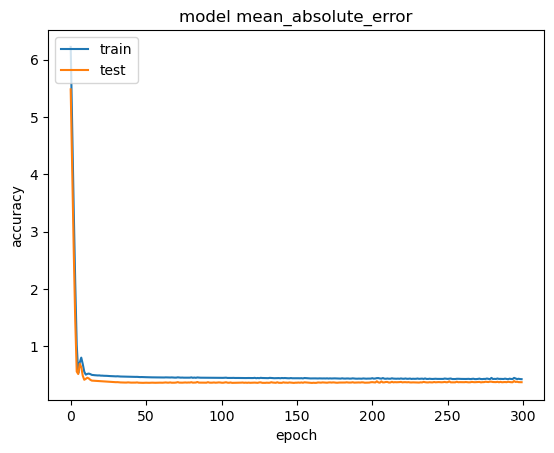

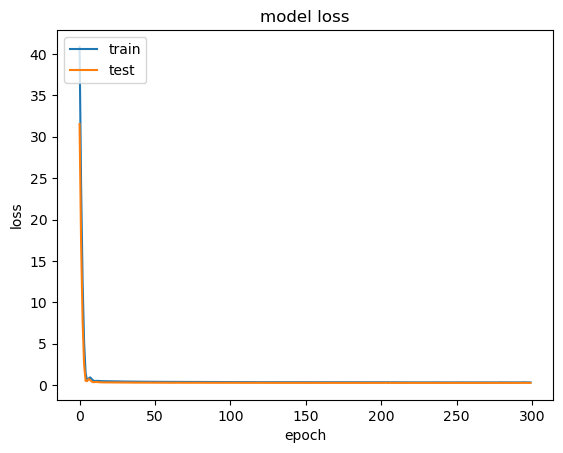

In [24]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=300, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4506 - mean_absolute_error: 0.4345
Metric  loss : 0.45
Metric  mean_absolute_error : 0.43


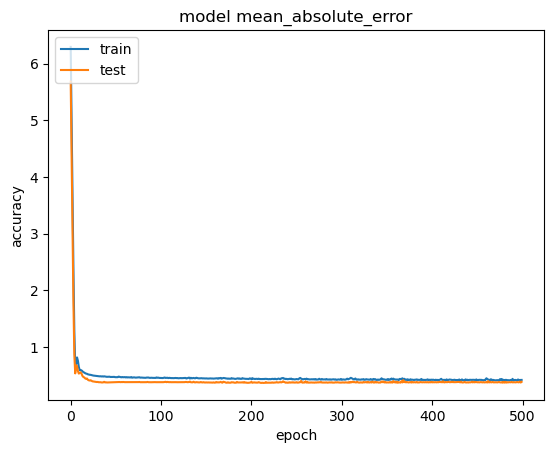

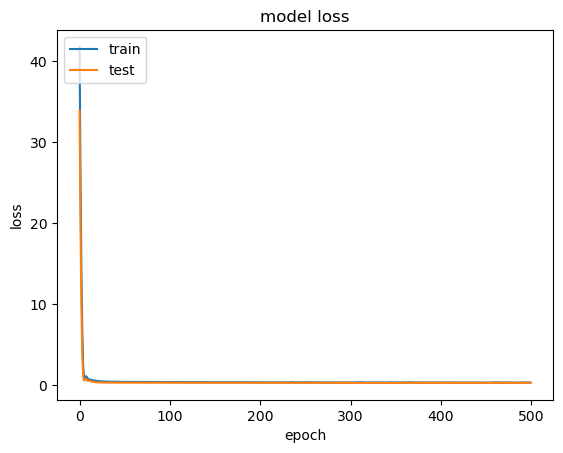

In [26]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.6657 - mean_absolute_error: 0.5120
Metric  loss : 0.67
Metric  mean_absolute_error : 0.51


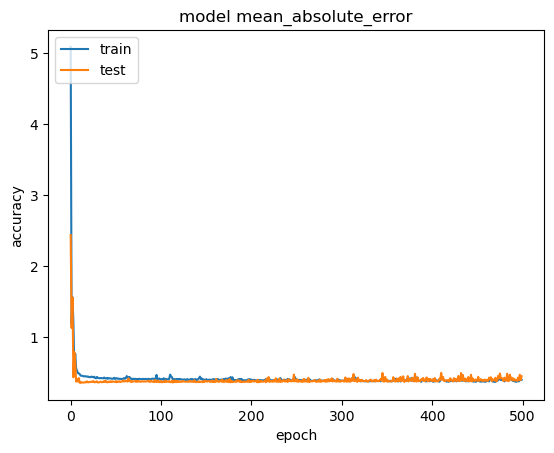

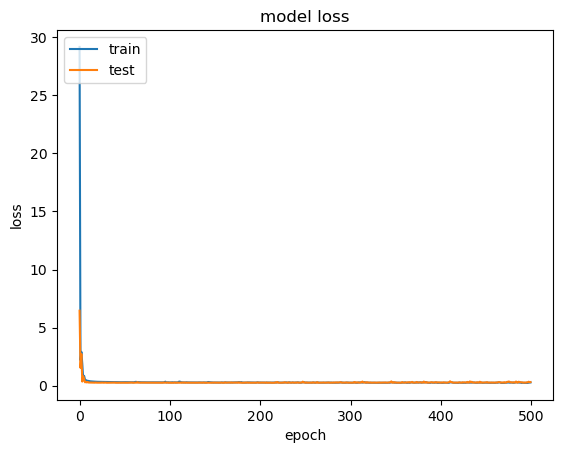

In [27]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 3ms/step - loss: 0.6707 - mean_absolute_error: 0.4907
Metric  loss : 0.67
Metric  mean_absolute_error : 0.49


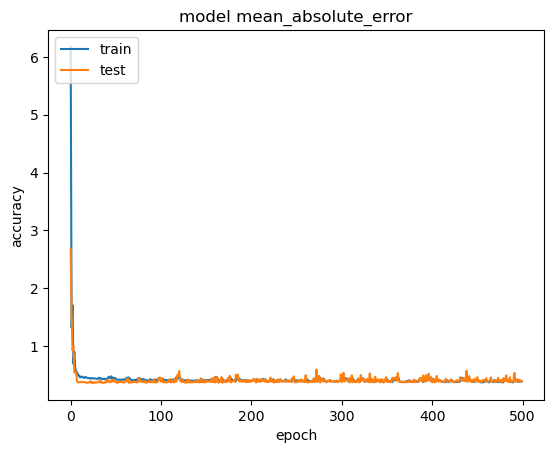

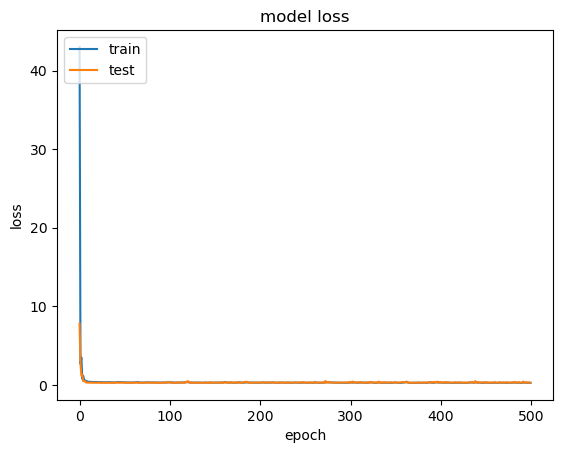

In [28]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.7312 - mean_absolute_error: 0.5937
Metric  loss : 0.73
Metric  mean_absolute_error : 0.59


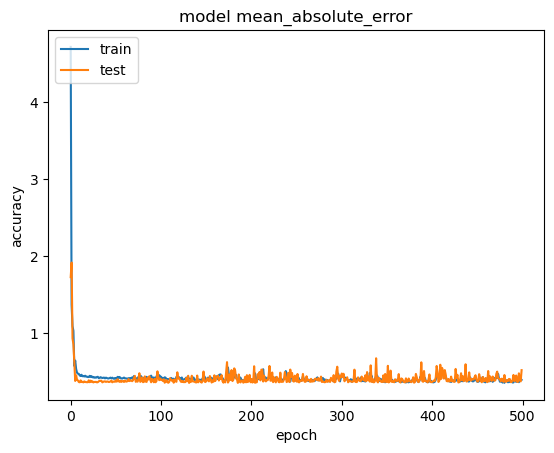

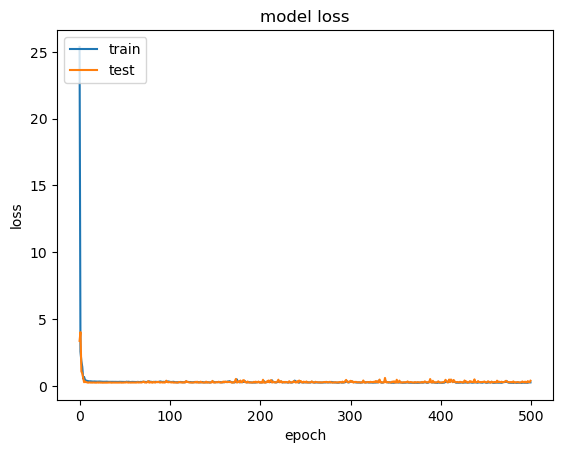

In [29]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.8339 - mean_absolute_error: 0.5764
Metric  loss : 0.83
Metric  mean_absolute_error : 0.58


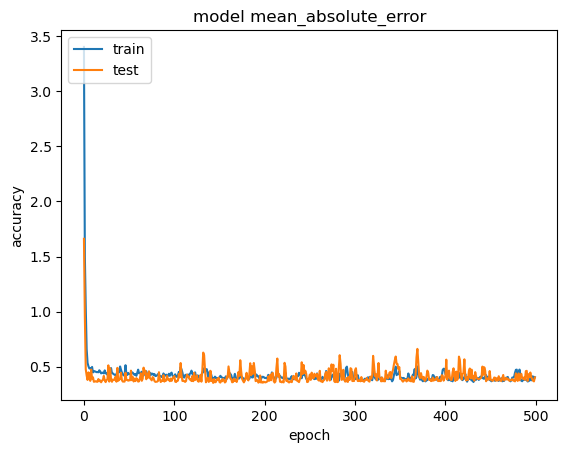

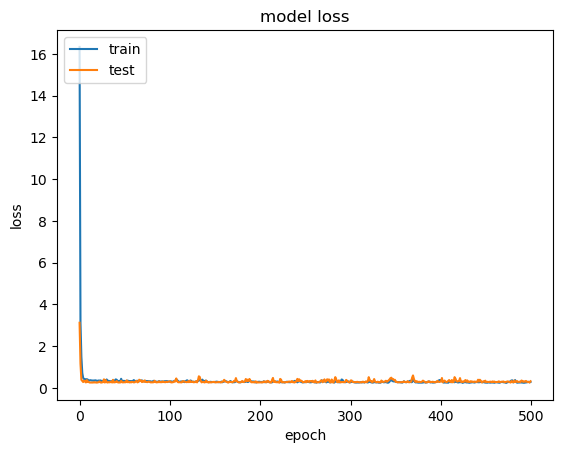

In [30]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 3ms/step - loss: 0.5783 - mean_absolute_error: 0.4783
Metric  loss : 0.58
Metric  mean_absolute_error : 0.48


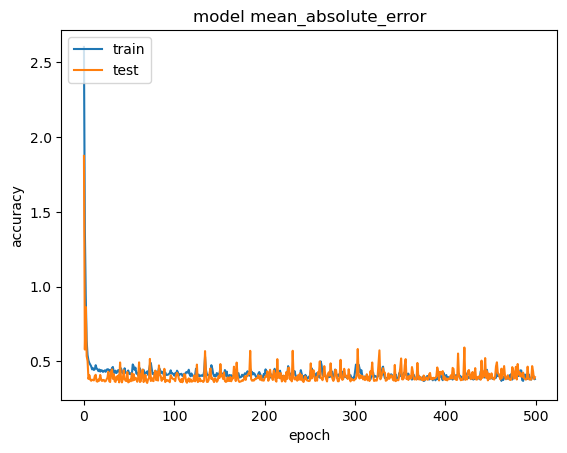

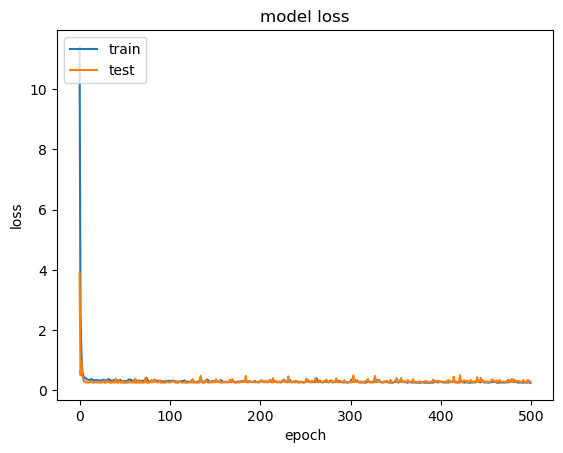

In [31]:
model = Sequential()
model.add(Dense(500, input_dim=3, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.6501 - mean_absolute_error: 0.4861
Metric  loss : 0.65
Metric  mean_absolute_error : 0.49


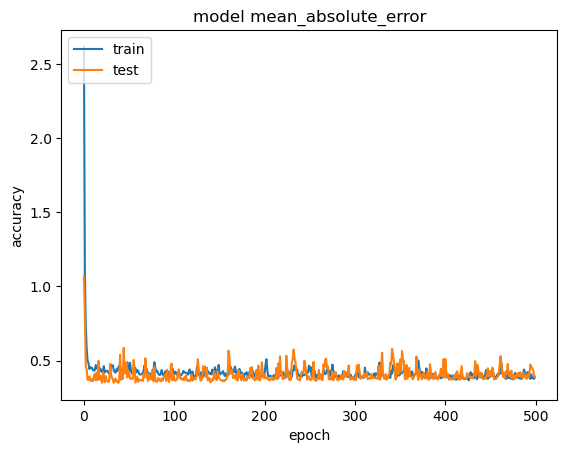

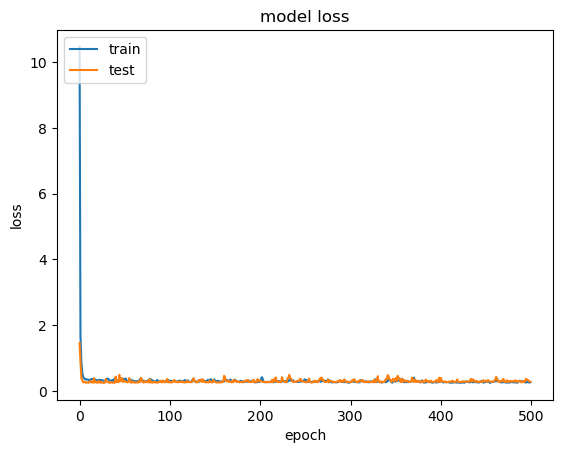

In [32]:
model = Sequential()
model.add(Dense(500, input_dim=3, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 4ms/step - loss: 0.6577 - mean_absolute_error: 0.4967
Metric  loss : 0.66
Metric  mean_absolute_error : 0.5


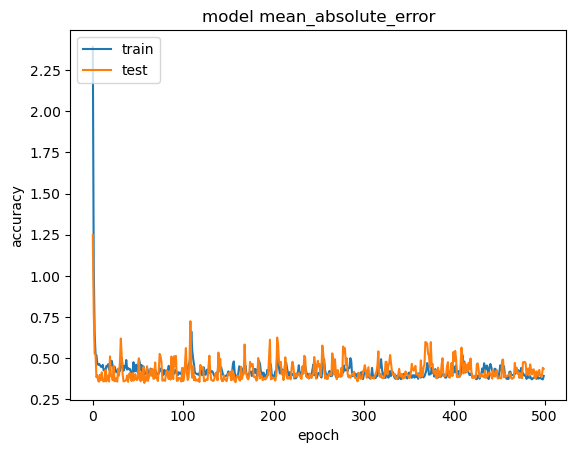

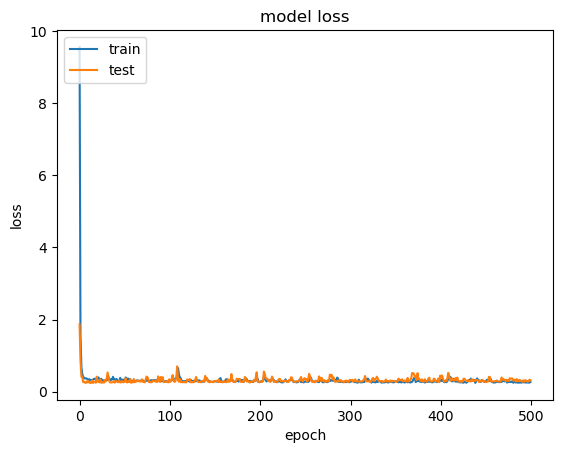

In [33]:
model = Sequential()
model.add(Dense(500, input_dim=3, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5166 - mean_absolute_error: 0.4563
Metric  loss : 0.52
Metric  mean_absolute_error : 0.46


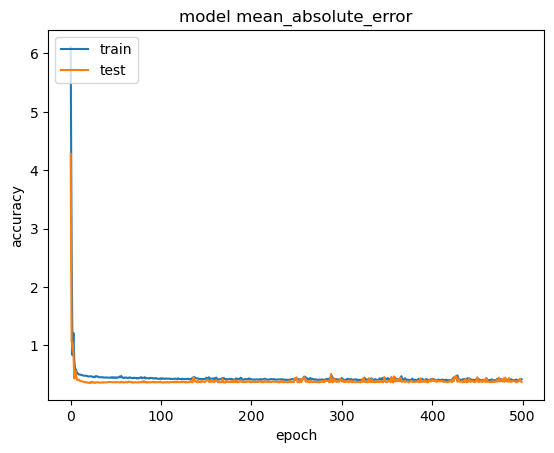

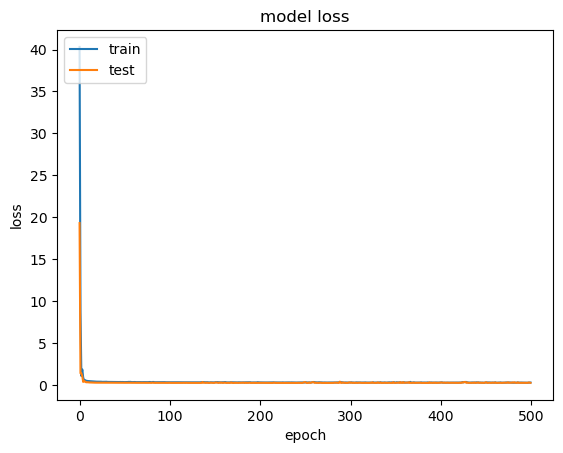

In [34]:
model = Sequential()
model.add(Dense(500, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4970 - mean_absolute_error: 0.4461
Metric  loss : 0.5
Metric  mean_absolute_error : 0.45


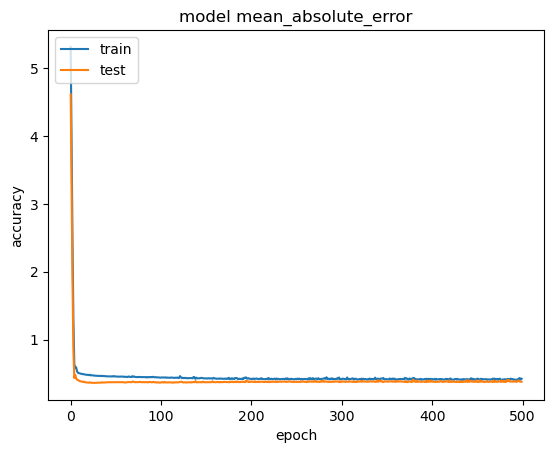

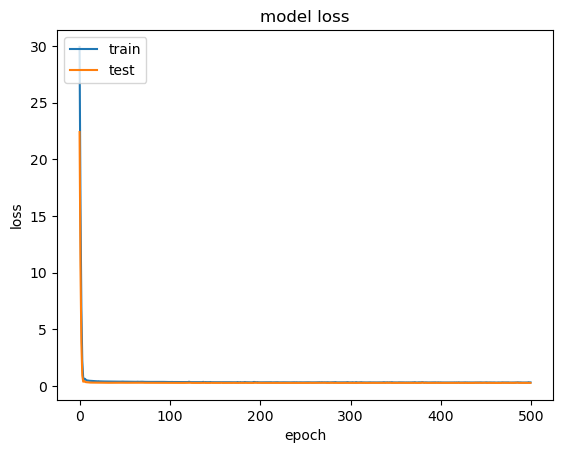

In [35]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4733 - mean_absolute_error: 0.4342
Metric  loss : 0.47
Metric  mean_absolute_error : 0.43


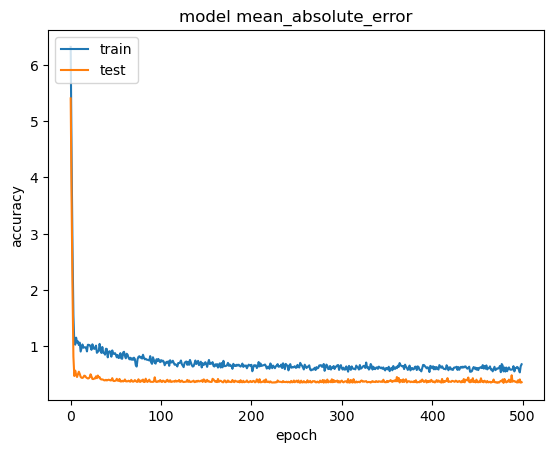

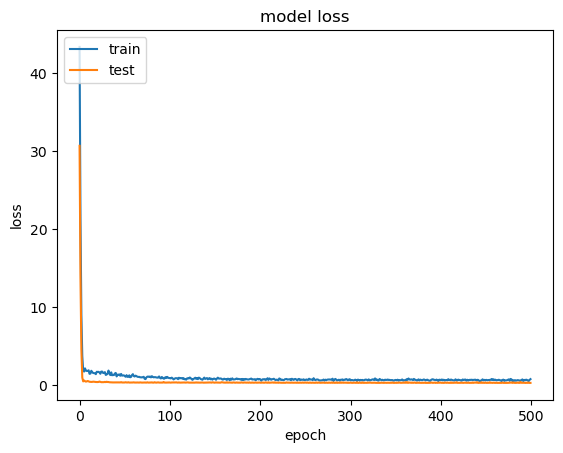

In [36]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4790 - mean_absolute_error: 0.4709
Metric  loss : 0.48
Metric  mean_absolute_error : 0.47


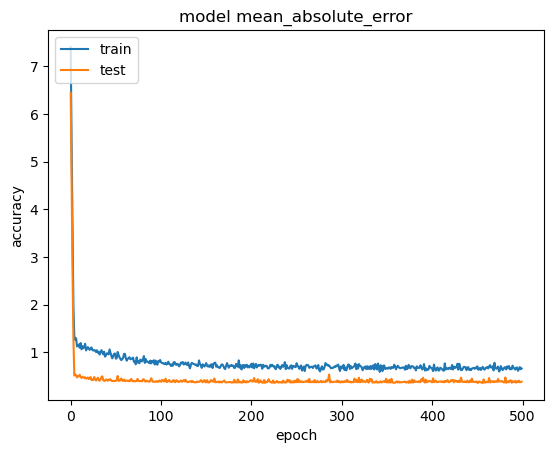

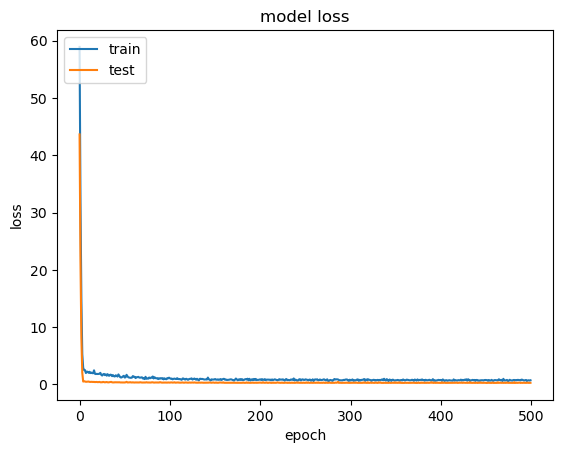

In [37]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4754 - mean_absolute_error: 0.5031
Metric  loss : 0.48
Metric  mean_absolute_error : 0.5


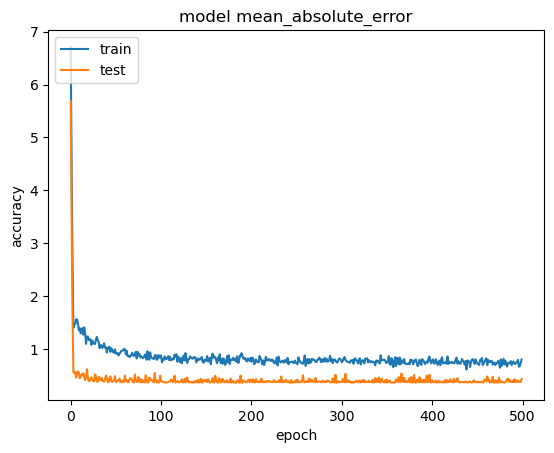

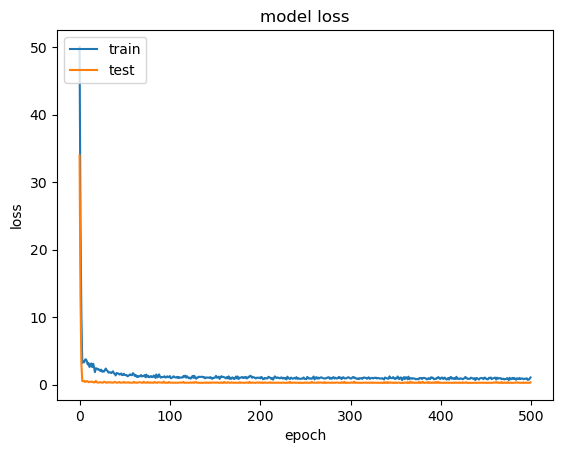

In [38]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=500, batch_size=20, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5315 - mean_absolute_error: 0.4581
Metric  loss : 0.53
Metric  mean_absolute_error : 0.46


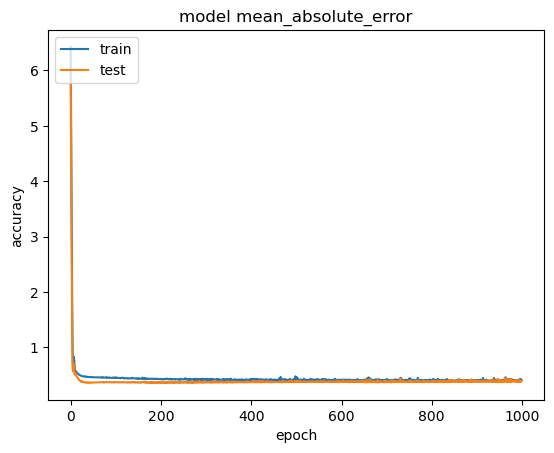

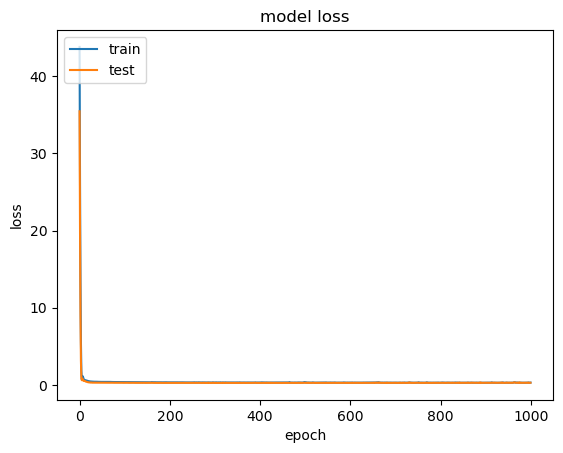

In [39]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=1000, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.6522 - mean_absolute_error: 0.5069
Metric  loss : 0.65
Metric  mean_absolute_error : 0.51


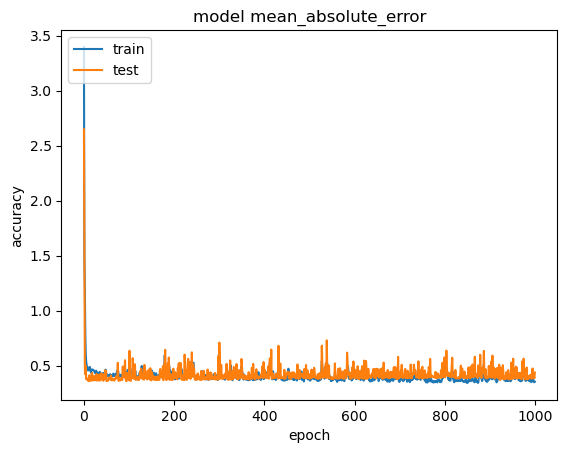

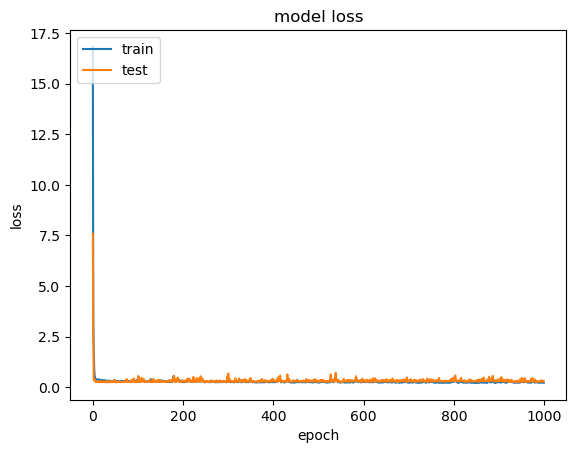

In [40]:
model = Sequential()
model.add(Dense(300, input_dim=3, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=1000, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 4ms/step - loss: 0.6920 - mean_absolute_error: 0.5415
Metric  loss : 0.69
Metric  mean_absolute_error : 0.54


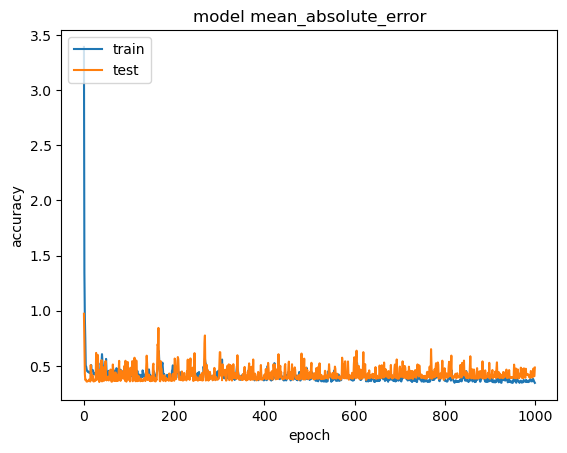

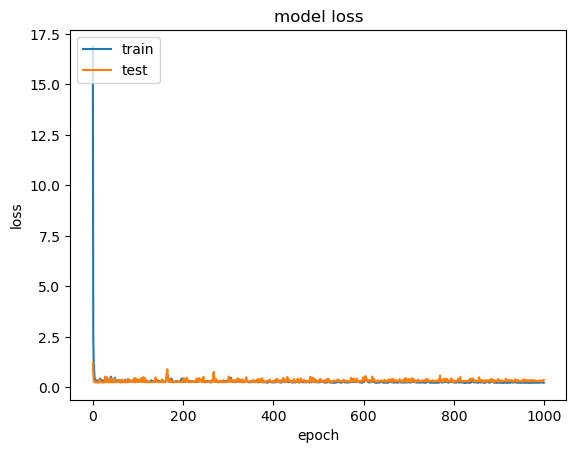

In [41]:
model = Sequential()
model.add(Dense(500, input_dim=3, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=1000, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 3ms/step - loss: 2.0139 - mean_absolute_error: 1.3162
Metric  loss : 2.01
Metric  mean_absolute_error : 1.32


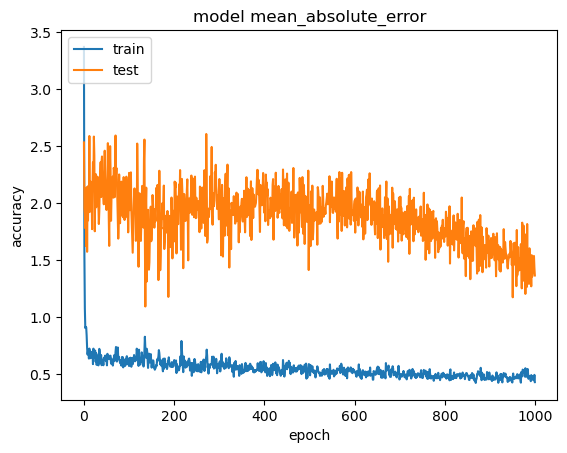

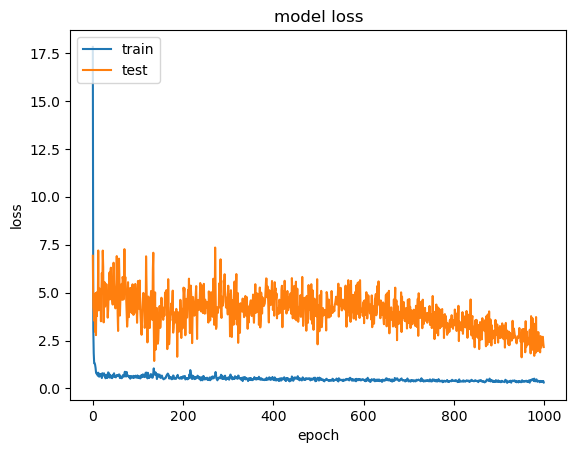

In [42]:
model = Sequential()
model.add(Dense(500, input_dim=3, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=1000, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4835 - mean_absolute_error: 0.4860
Metric  loss : 0.48
Metric  mean_absolute_error : 0.49


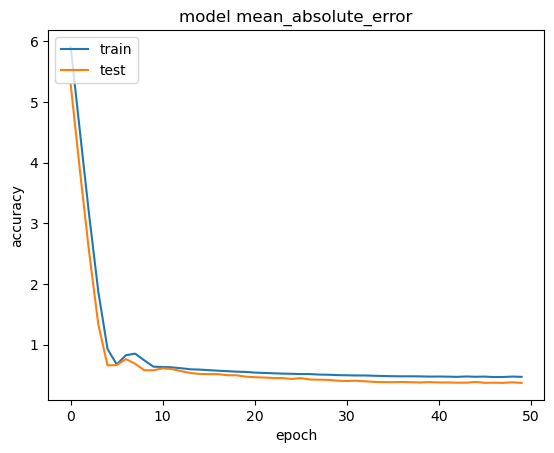

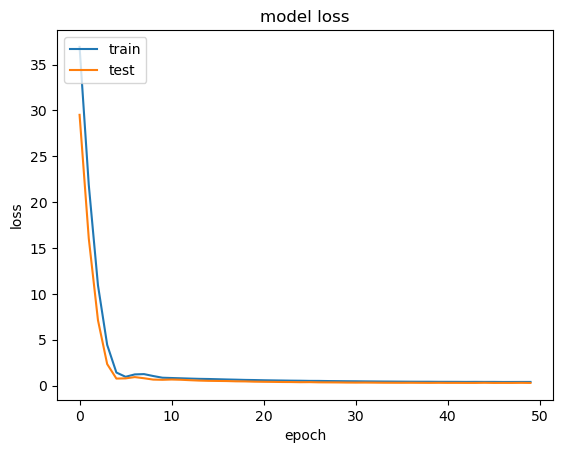

In [44]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5039 - mean_absolute_error: 0.4900
Metric  loss : 0.5
Metric  mean_absolute_error : 0.49


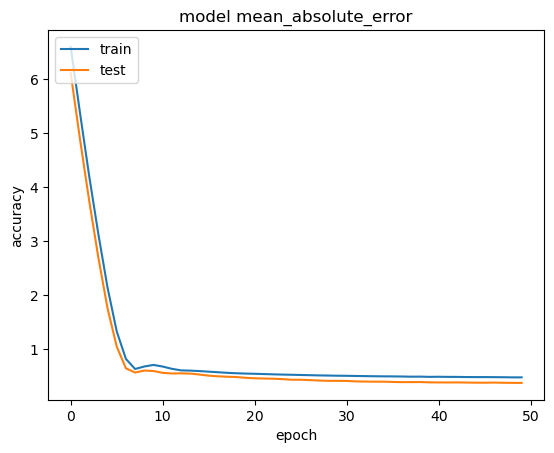

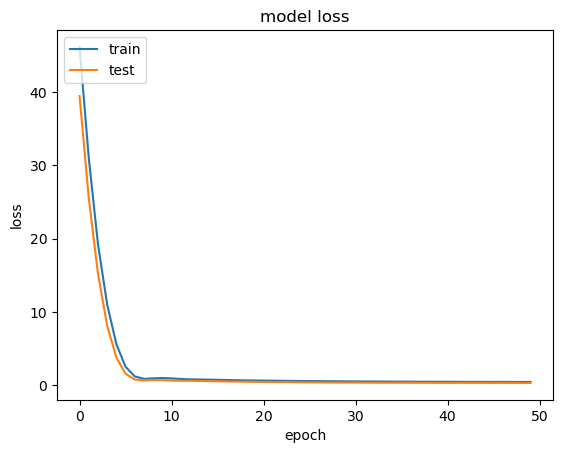

In [45]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4957 - mean_absolute_error: 0.4882
Metric  loss : 0.5
Metric  mean_absolute_error : 0.49


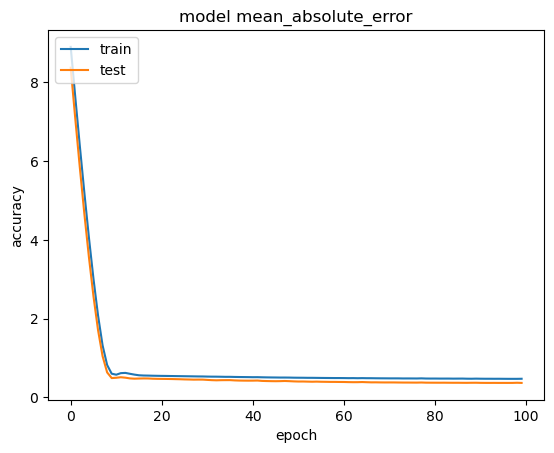

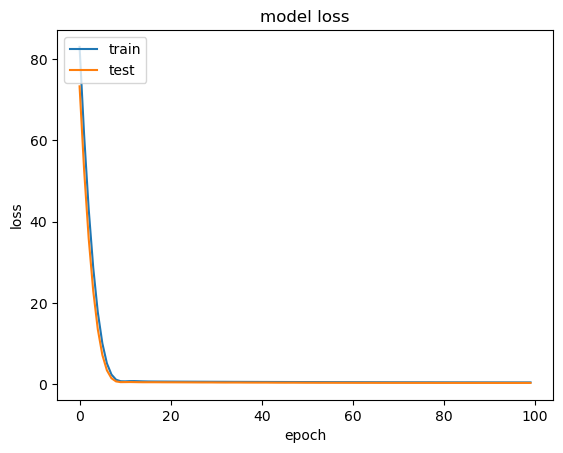

In [46]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_absolute_error: 0.4499
Metric  loss : 0.42
Metric  mean_absolute_error : 0.45


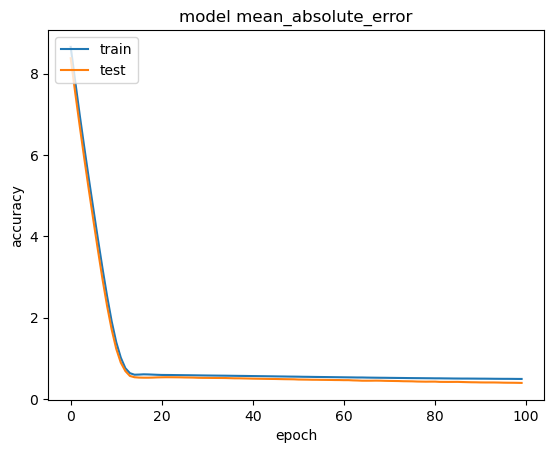

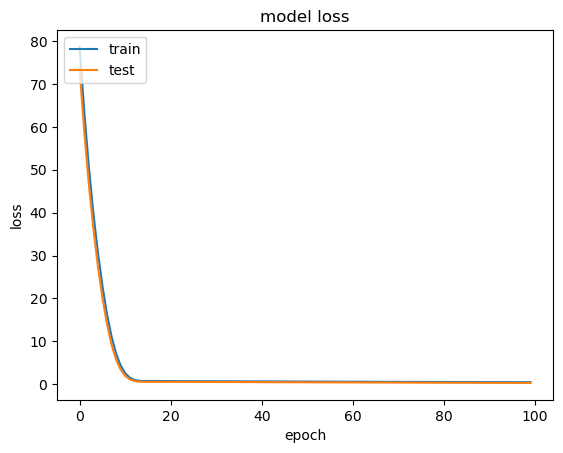

In [47]:
model = Sequential()
model.add(Dense(50, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4165 - mean_absolute_error: 0.4526
Metric  loss : 0.42
Metric  mean_absolute_error : 0.45


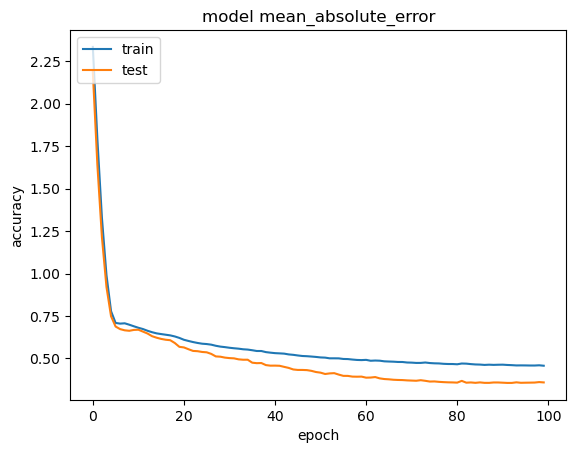

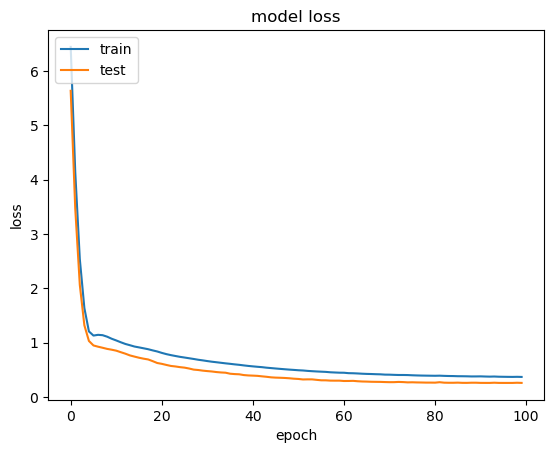

In [48]:
model = Sequential()
model.add(Dense(25, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5902 - mean_absolute_error: 0.5446
Metric  loss : 0.59
Metric  mean_absolute_error : 0.54


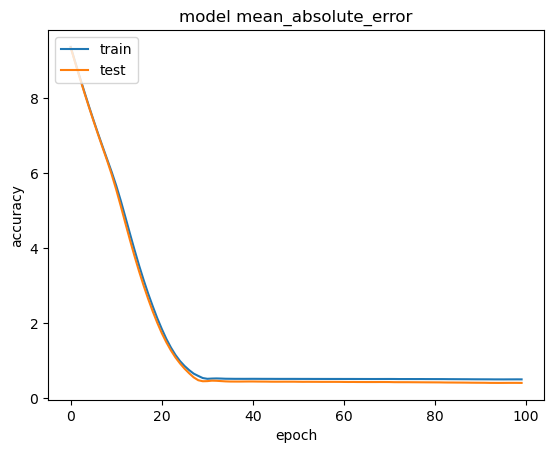

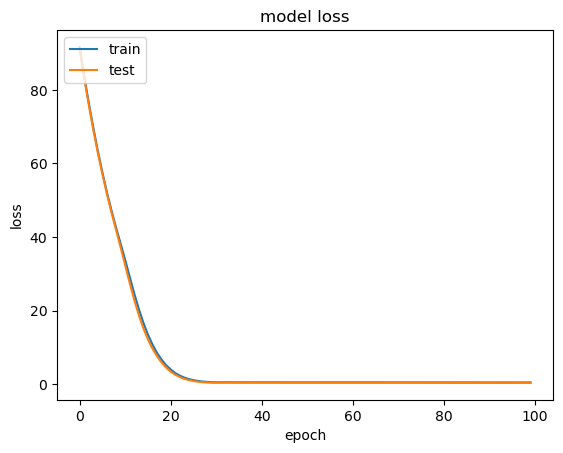

In [49]:
model = Sequential()
model.add(Dense(15, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.7406 - mean_absolute_error: 0.6272
Metric  loss : 0.74
Metric  mean_absolute_error : 0.63


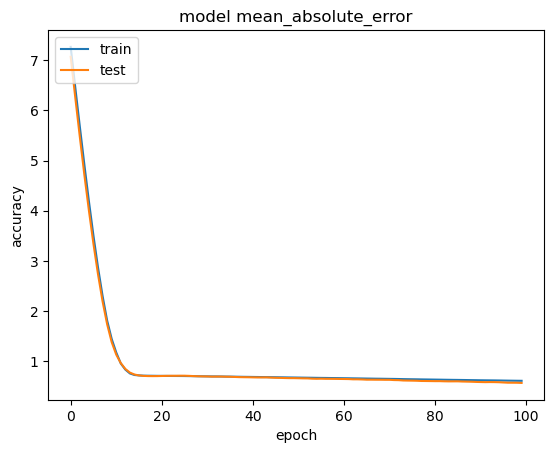

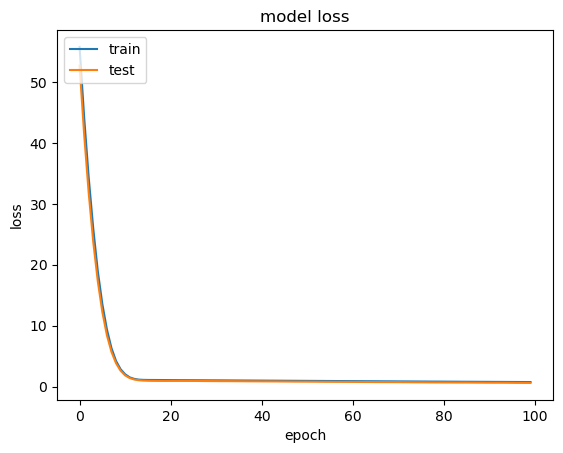

In [51]:
model = Sequential()
model.add(Dense(25, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5687 - mean_absolute_error: 0.5000
Metric  loss : 0.57
Metric  mean_absolute_error : 0.5


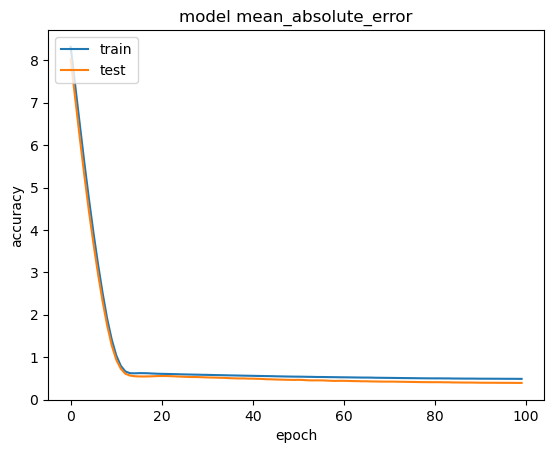

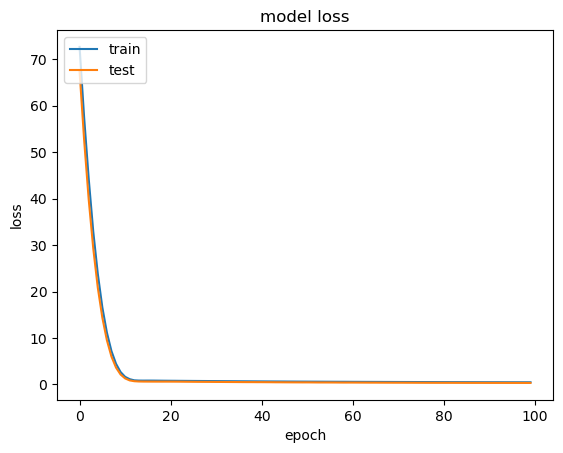

In [53]:
model = Sequential()
model.add(Dense(50, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4949 - mean_absolute_error: 0.4786
Metric  loss : 0.49
Metric  mean_absolute_error : 0.48


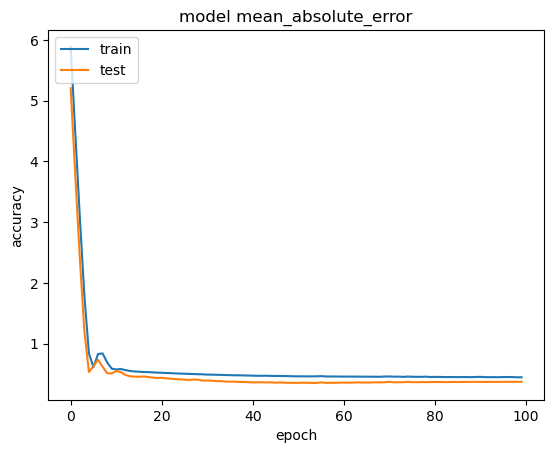

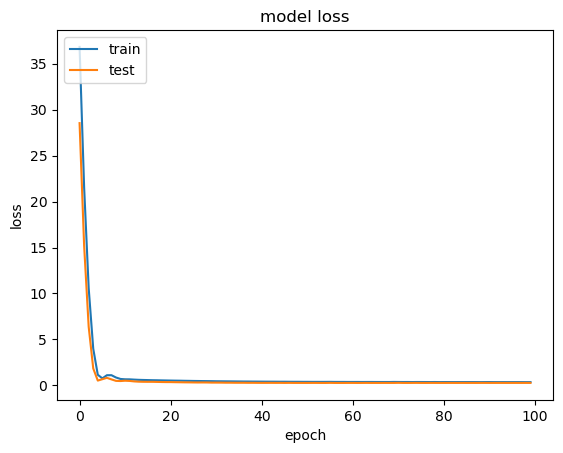

In [56]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5473 - mean_absolute_error: 0.5075
Metric  loss : 0.55
Metric  mean_absolute_error : 0.51


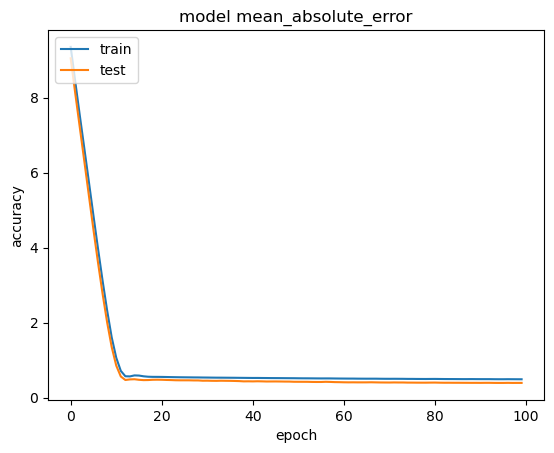

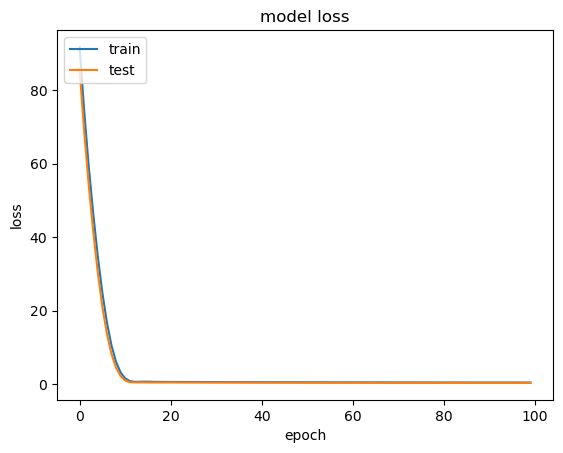

In [57]:
model = Sequential()
model.add(Dense(50, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4855 - mean_absolute_error: 0.4847
Metric  loss : 0.49
Metric  mean_absolute_error : 0.48


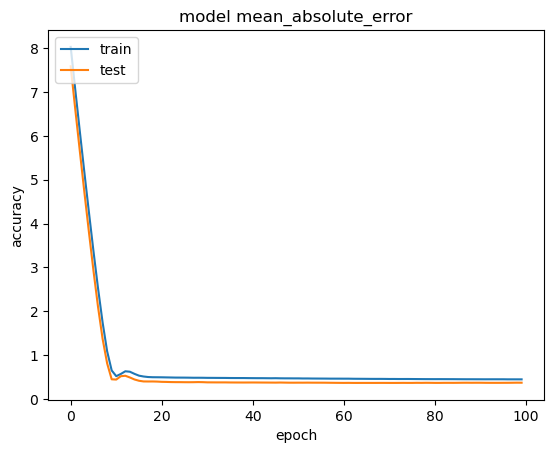

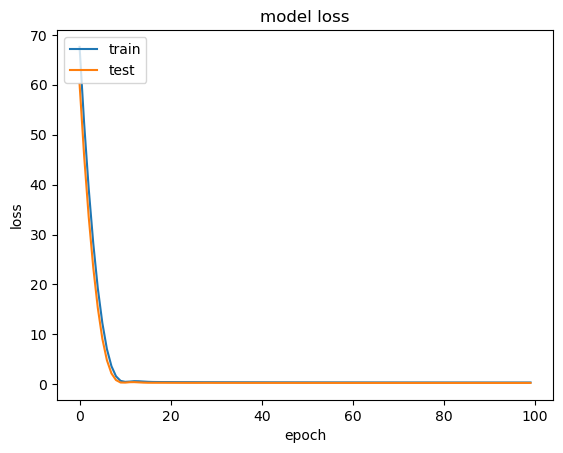

In [58]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=40, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4734 - mean_absolute_error: 0.4777
Metric  loss : 0.47
Metric  mean_absolute_error : 0.48


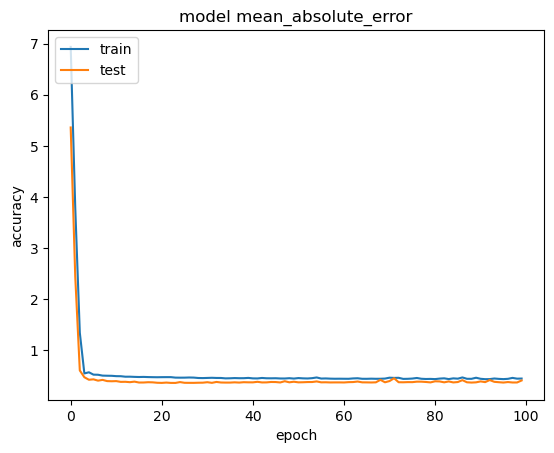

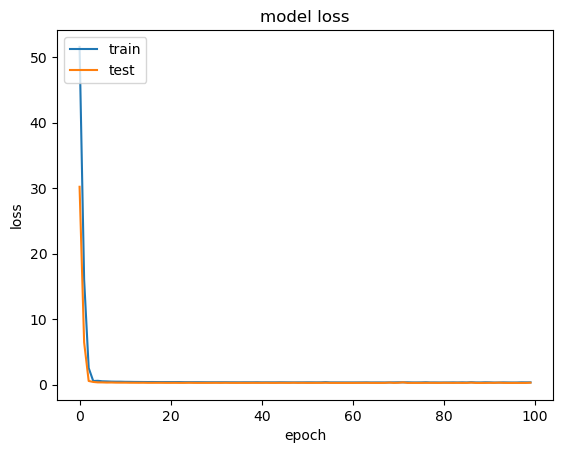

In [59]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=10, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4864 - mean_absolute_error: 0.4669
Metric  loss : 0.49
Metric  mean_absolute_error : 0.47


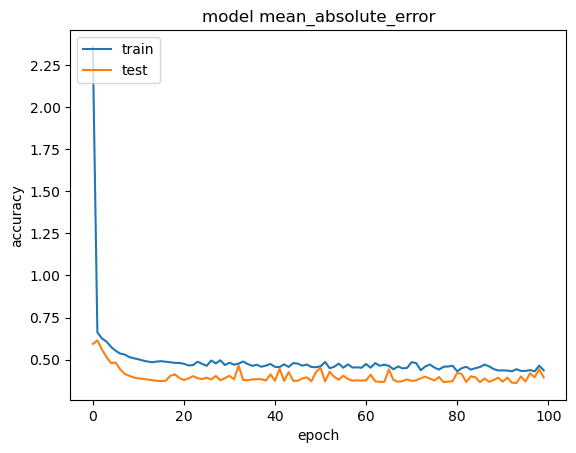

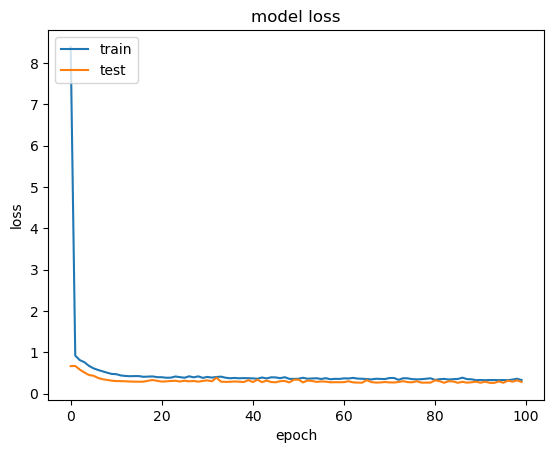

In [60]:
model = Sequential()
model.add(Dense(100, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=100, batch_size=5, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))
    
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4963 - mean_absolute_error: 0.4792
Metric  loss : 0.5
Metric  mean_absolute_error : 0.48


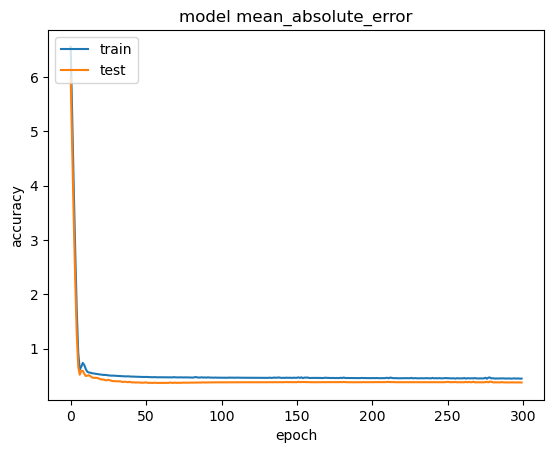

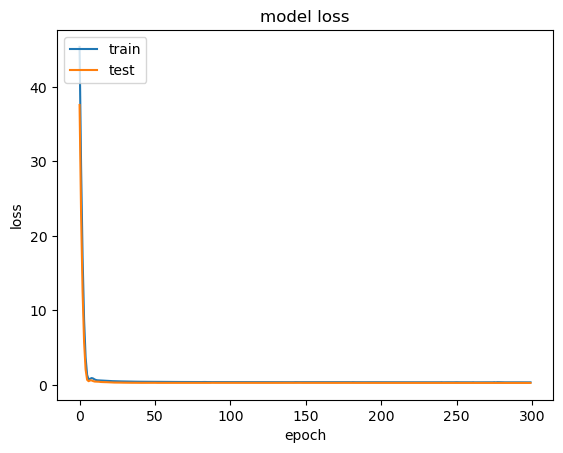

In [61]:
model = Sequential()
model.add(Dense(150, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=300, batch_size=32, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.4685 - mean_absolute_error: 0.4444
Metric  loss : 0.47
Metric  mean_absolute_error : 0.44


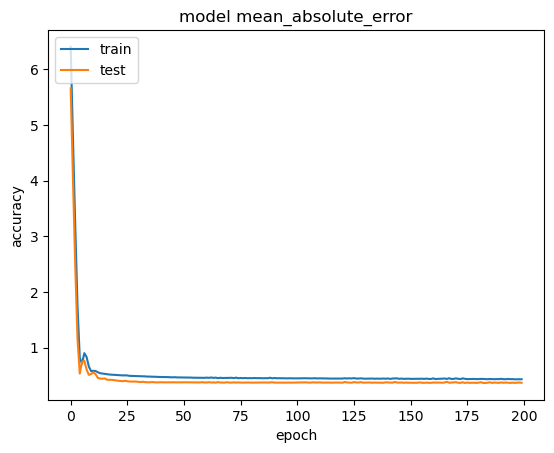

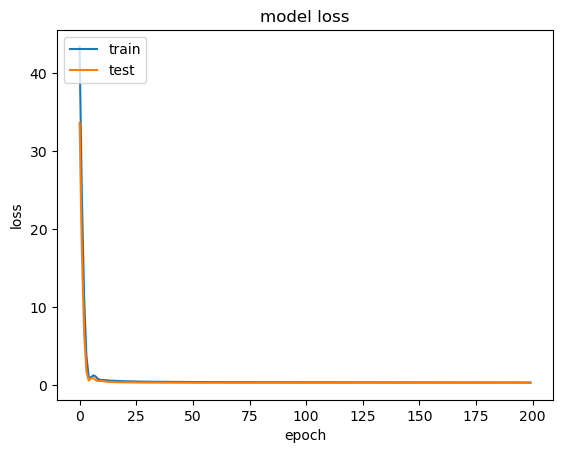

In [62]:
model = Sequential()
model.add(Dense(200, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=200, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
2/2 [==============================] - 0s 2ms/step - loss: 0.5193 - mean_absolute_error: 0.4795
Metric  loss : 0.52
Metric  mean_absolute_error : 0.48


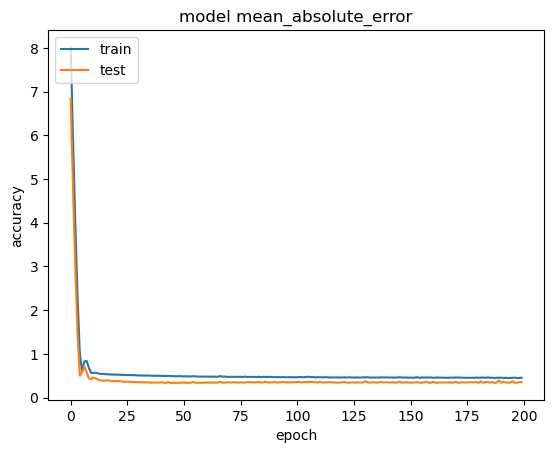

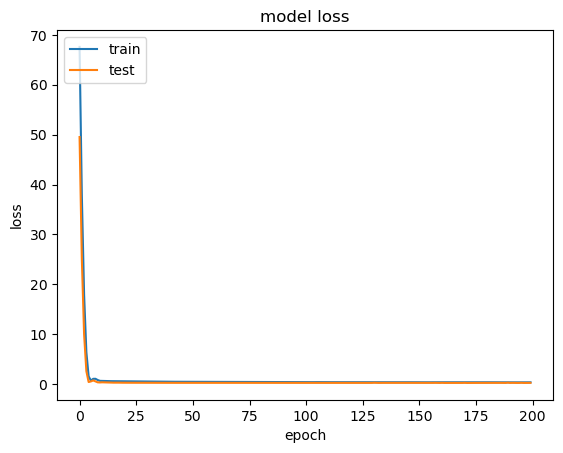

In [91]:
model = Sequential()
model.add(Dense(200, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=30, verbose=0)
print(history.history.keys())

result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
from tensorflow.keras.models import load_model
model.save('dudoandiemthi.h5')
loaded_model = load_model('dudoandiemthi.h5')

In [76]:
Y_pred = loaded_model.predict(X_test)
Y_pred

2/2 [==============================] - 0s 2ms/step


array([[ 7.335408  ],
       [ 6.615019  ],
       [ 6.89562   ],
       [ 5.560946  ],
       [ 7.6420813 ],
       [ 6.768846  ],
       [ 7.6871324 ],
       [ 6.726309  ],
       [ 7.0218954 ],
       [ 6.163779  ],
       [ 6.4373393 ],
       [ 6.43281   ],
       [ 8.140048  ],
       [ 6.4169035 ],
       [ 6.4588943 ],
       [ 6.4870644 ],
       [ 6.82432   ],
       [ 6.583252  ],
       [ 6.885814  ],
       [ 7.270482  ],
       [ 6.5596046 ],
       [ 7.142995  ],
       [ 7.5267706 ],
       [ 8.001924  ],
       [ 7.018175  ],
       [ 5.7267494 ],
       [ 6.6122437 ],
       [ 6.8845806 ],
       [ 7.5117044 ],
       [ 6.172934  ],
       [ 7.9652495 ],
       [ 7.237938  ],
       [ 6.2519293 ],
       [ 5.901054  ],
       [ 7.096548  ],
       [ 6.889729  ],
       [ 6.885814  ],
       [ 7.2842364 ],
       [ 7.388604  ],
       [ 8.615312  ],
       [ 6.9024467 ],
       [ 6.332432  ],
       [-0.00896407],
       [ 8.625718  ],
       [ 6.630925  ],
       [ 6

In [74]:
Y_test[:10]

array([7.5, 6.5, 7. , 6. , 9. , 6. , 7.5, 6.5, 7. , 6.5])

In [79]:
X_train

array([[ 7.35      ,  6.        ,  7.        ],
       [ 7.5       ,  6.        ,  6.        ],
       [ 7.5       ,  6.        ,  7.        ],
       [ 7.        ,  6.875     ,  7.        ],
       [ 8.        ,  6.75      ,  6.5       ],
       [ 7.5       ,  6.5       ,  6.75      ],
       [ 8.        ,  6.        ,  5.5       ],
       [ 7.        ,  6.25      ,  6.        ],
       [ 7.        ,  6.5       ,  6.        ],
       [ 8.25      ,  8.        ,  7.5       ],
       [ 8.25      ,  7.25      ,  6.5       ],
       [ 7.75      ,  6.25      ,  7.25      ],
       [ 5.75      ,  6.75      ,  7.25      ],
       [ 8.        ,  3.75      ,  7.        ],
       [ 7.75      ,  7.        ,  6.5       ],
       [ 7.5       ,  7.5       ,  7.5       ],
       [ 7.6       ,  7.        ,  7.        ],
       [ 8.375     ,  7.675     ,  7.        ],
       [ 7.25      ,  7.5       ,  7.        ],
       [ 7.75      ,  7.25      ,  7.25      ],
       [ 7.375     ,  7.375     ,  6.5  

In [80]:
X_test

array([[9.        , 7.25      , 7.5       ],
       [7.75      , 6.375     , 6.8       ],
       [8.        , 7.        , 7.        ],
       [3.75      , 2.625     , 6.        ],
       [7.5       , 7.        , 8.        ],
       [6.5       , 6.625     , 7.        ],
       [8.5       , 7.625     , 7.875     ],
       [7.12      , 6.25      , 7.        ],
       [7.625     , 6.75      , 7.25      ],
       [6.5       , 6.5       , 6.        ],
       [7.25      , 7.        , 6.        ],
       [8.        , 6.625     , 6.5       ],
       [7.5       , 7.625     , 8.5       ],
       [6.5       , 6.875     , 6.        ],
       [7.        , 7.        , 6.        ],
       [8.        , 6.75      , 6.5       ],
       [7.        , 3.25      , 7.25      ],
       [7.25      , 6.5       , 6.75      ],
       [7.        , 7.        , 7.        ],
       [8.        , 7.        , 7.5       ],
       [7.30147458, 6.59431034, 6.69397627],
       [7.        , 6.25      , 7.5       ],
       [7.

In [88]:
loaded_model.predict([[ 7.35      ,  6.        ,  7.        ],
       [ 7.5       ,  6.        ,  6.        ],])

1/1 [==============================] - 0s 30ms/step


array([[6.6964755],
       [5.9066887]], dtype=float32)